<a href="https://colab.research.google.com/github/MukeshK001/Mask_RCNN/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import ImageDataGenerator from tensorflow.keras.utils instead of keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # image generator label data based on the dir the image in contained in
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from google.colab import files

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/Archieve.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest_xray')
zip_ref.close()

In [6]:
train_normal_dir = os.path.join('/tmp/chest_xray/chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join('/tmp/chest_xray/chest_xray/train/PNEUMONIA')
test_normal_dir = os.path.join('/tmp/chest_xray/chest_xray/val/NORMAL')
test_pneumonia_dir = os.path.join('/tmp/chest_xray/chest_xray/val/PNEUMONIA')

train_normal_names = os.listdir(train_normal_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)
test_normal_names = os.listdir(test_normal_dir)
test_pneumonia_names = os.listdir(test_pneumonia_dir)

In [7]:
print('total train normal chest xray: ', len(os.listdir(train_normal_dir)))
print('total train pneumonia chest xray:', len(os.listdir(train_pneumonia_dir)))
print('total test normal chest xray: ', len(os.listdir(test_normal_dir)))
print('total test pneumonia chest xray: ', len(os.listdir(test_pneumonia_dir)))

total train normal chest xray:  1341
total train pneumonia chest xray: 3875
total test normal chest xray:  8
total test pneumonia chest xray:  8


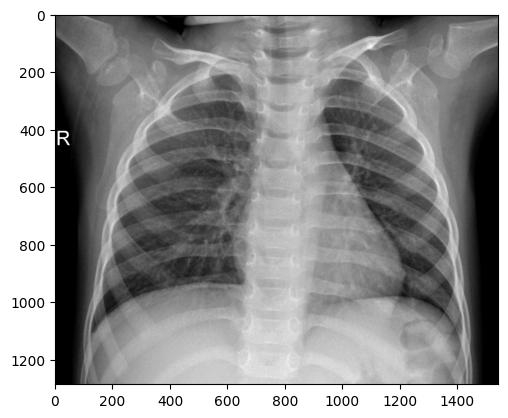

In [8]:
train_normal_names[1]
# 'IM-0544-0001.jpeg'
img = mpimg.imread(os.path.join(train_normal_dir,'IM-0544-0001.jpeg'))
plt.imshow(img, cmap = 'gray')

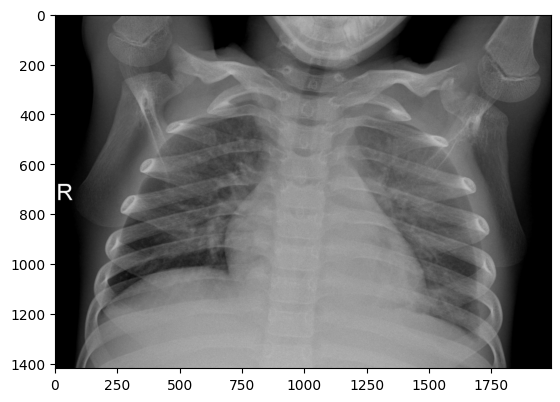

In [9]:
train_pneumonia_names[1]
# 'person297_virus_614.jpeg'
img = mpimg.imread(os.path.join(train_pneumonia_dir, 'person297_virus_614.jpeg'))
plt.imshow(img, cmap = 'gray')

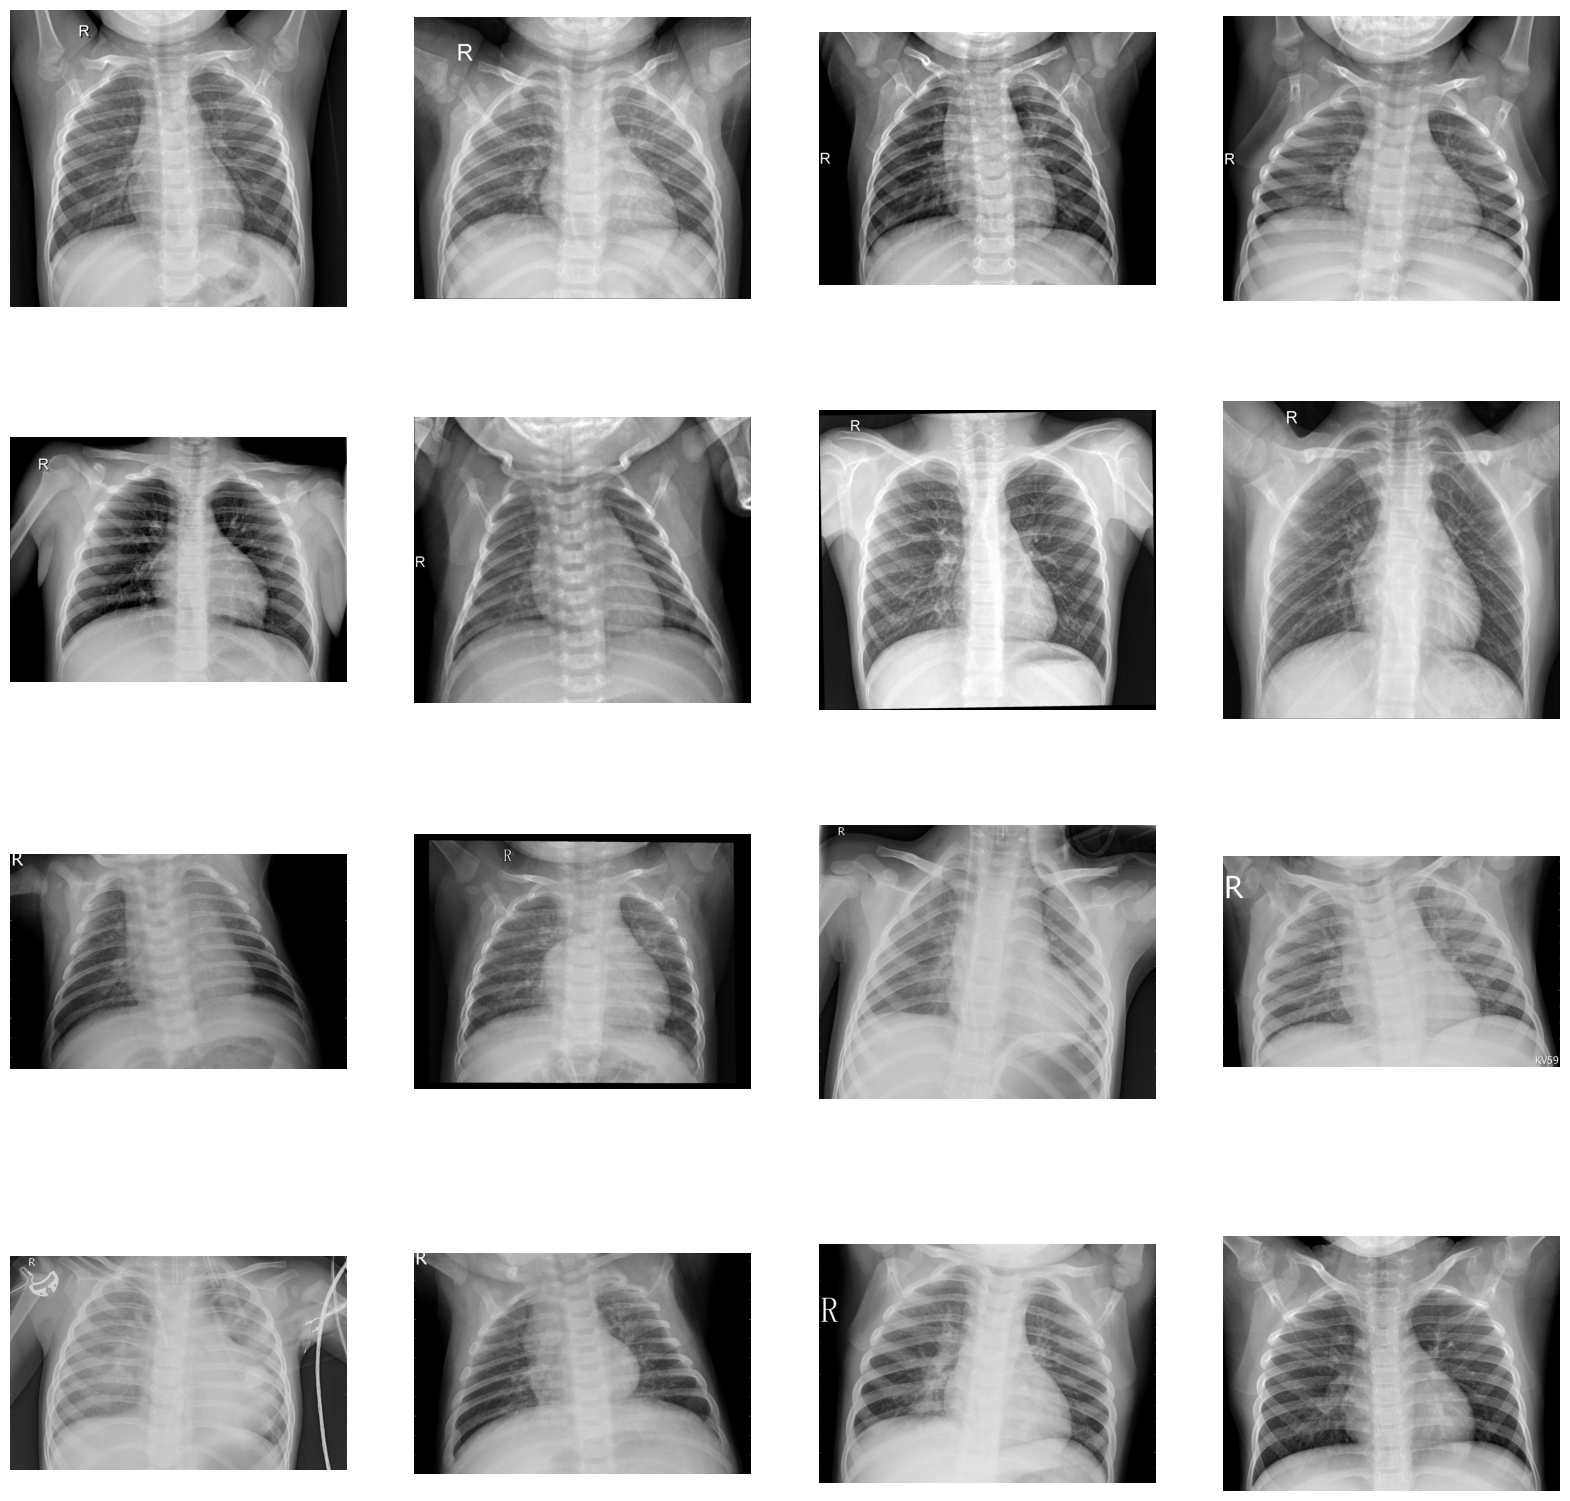

In [10]:
# parameters for graph
nrows = 4
ncols = 4


fig = plt.gcf() #get the current image
fig.set_size_inches(20, 20) #image size

next_normal_pix = [os.path.join(train_normal_dir, fname)
                    for fname in train_normal_names[0:8]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname)
                      for fname in train_pneumonia_names[0:8]]

for i, img_path in enumerate(next_normal_pix + next_pneumonia_pix):
  # set up subplot
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

In [11]:
model = tf.keras.models.Sequential([

    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,816,161 (26.00 MB)

 Trainable params: 6,816,161 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/chest_xray/chest_xray/train/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/tmp/chest_xray/chest_xray/val/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5545 - loss: 0.7386 - val_accuracy: 0.5000 - val_loss: 0.7113
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7379 - loss: 0.6150 - val_accuracy: 0.5000 - val_loss: 0.9207
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7214 - loss: 0.6043 - val_accuracy: 0.5000 - val_loss: 0.8204
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7343 - loss: 0.6033 - val_accuracy: 0.5000 - val_loss: 0.9827
Epoch 5/10
 1/10 ━━━━━━━━━━━━━━━━━━━━ 8s 987ms/step - accuracy: 0.7344 - loss: 0.6095

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7344 - loss: 0.6095 - val_accuracy: 0.5000 - val_loss: 0.7325
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7663 - loss: 0.5597 - val_accuracy: 0.5000 - val_loss: 0.7343
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7440 - loss: 0.5790 - val_accuracy: 0.5000 - val_loss: 0.7246
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7361 - loss: 0.5737 - val_accuracy: 0.5000 - val_loss: 0.8102
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7437 - loss: 0.5708 - val_accuracy: 0.5000 - val_loss: 0.8967
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8047 - loss: 0.4328 - val_accuracy: 0.5000 - val_loss: 0.7939


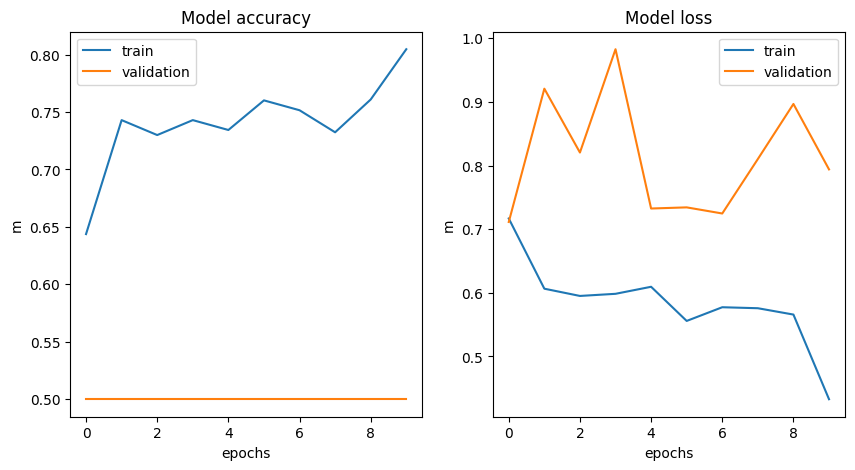

In [17]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])


In [19]:
# load new unseen dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    '/tmp/chest_xray/chest_xray/val/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)
# Replace evaluate_generator with evaluate and pass the generator
eval_result = model.evaluate(test_generator, steps=len(test_generator))  # steps is optional but recommended
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 16 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5000 - loss: 0.7939
loss rate at evaluation data : 0.7939319610595703
accuracy rate at evaluation data : 0.5


Saving IM-0127-0001.jpeg to IM-0127-0001.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.]
IM-0127-0001.jpeg is pneumonia


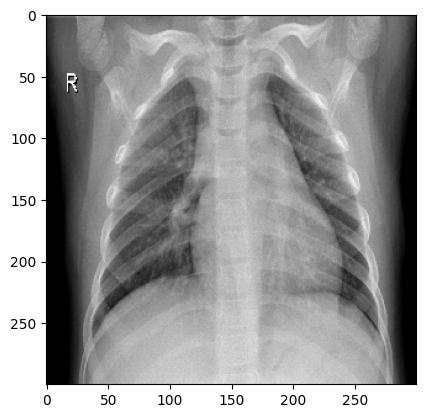

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + ' is pneumonia')
    plt.imshow(img)
  else:
    print(fn + 'is normal')
    plt.imshow(img)

Saving IM-0009-0001.jpeg to IM-0009-0001.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.6461836]
IM-0009-0001.jpeg is pneumonia


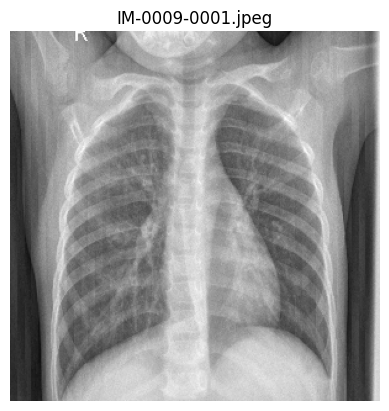

In [23]:
uploaded = files.upload()

for fn in uploaded.keys():
    try:
        path = '/content/' + fn
        img = image.load_img(path, target_size=(300, 300))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Normalize the image if required
        x = x / 255.0  # Example normalization

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)

        print(classes[0])
        if classes[0] > 0.5:
            print(fn + ' is pneumonia')
        else:
            print(fn + ' is normal')

        plt.imshow(img)
        plt.title(fn)
        plt.axis('off')  # Hide axes
        plt.show()  # Ensure the image is displayed

    except Exception as e:
        print(f"Error processing {fn}: {e}")

Saving IM-0009-0001.jpeg to IM-0009-0001 (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for IM-0009-0001 (1).jpeg: 0.6462
IM-0009-0001 (1).jpeg is classified as normal with a probability of 0.35.


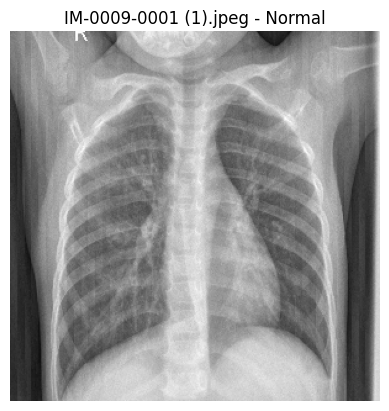

In [32]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming 'model' is your pre-trained model
uploaded = files.upload()

for fn in uploaded.keys():
    try:
        # Load and preprocess the image
        path = '/content/' + fn
        img = image.load_img(path, target_size=(300, 300))  # Adjust target size as needed
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Normalize the image if required (depends on how your model was trained)
        x = x / 255.0  # Example normalization

        # Make predictions
        classes = model.predict(x, batch_size=10)

        # Get the prediction probability
        prediction_probability = classes[0][0]
        print(f"Prediction for {fn}: {prediction_probability:.4f}")  # Format to 4 decimal places

        # Determine if pneumonia is present
        if prediction_probability > 0.70:  # Adjust threshold as necessary
            print(f"{fn} is classified as pneumonia with a probability of {prediction_probability:.2f}.")
        else:
            print(f"{fn} is classified as normal with a probability of {1 - prediction_probability:.2f}.")

        # Display the image
        plt.imshow(img)
        plt.title(fn + ' - ' + ('Pneumonia' if prediction_probability > 0.70 else 'Normal'))
        plt.axis('off')  # Hide axes
        plt.show()  # Show the image

    except Exception as e:
        print(f"Error processing {fn}: {e}")

Saving person1_virus_6.jpeg to person1_virus_6.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for person1_virus_6.jpeg: 0.8240
person1_virus_6.jpeg is classified as pneumonia with a probability of 0.82.


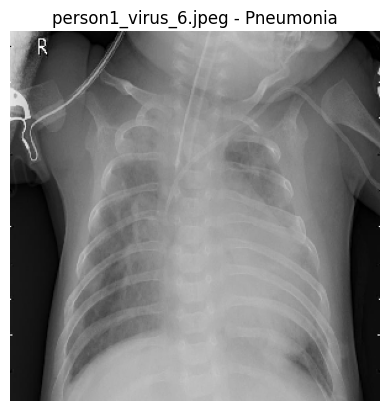

In [33]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming 'model' is your pre-trained model
uploaded = files.upload()

for fn in uploaded.keys():
    try:
        # Load and preprocess the image
        path = '/content/' + fn
        img = image.load_img(path, target_size=(300, 300))  # Adjust target size as needed
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Normalize the image if required (depends on how your model was trained)
        x = x / 255.0  # Example normalization

        # Make predictions
        classes = model.predict(x, batch_size=10)

        # Get the prediction probability
        prediction_probability = classes[0][0]
        print(f"Prediction for {fn}: {prediction_probability:.4f}")  # Format to 4 decimal places

        # Determine if pneumonia is present
        if prediction_probability > 0.70:  # Adjust threshold as necessary
            print(f"{fn} is classified as pneumonia with a probability of {prediction_probability:.2f}.")
        else:
            print(f"{fn} is classified as normal with a probability of {1 - prediction_probability:.2f}.")

        # Display the image
        plt.imshow(img)
        plt.title(fn + ' - ' + ('Pneumonia' if prediction_probability > 0.70 else 'Normal'))
        plt.axis('off')  # Hide axes
        plt.show()  # Show the image

    except Exception as e:
        print(f"Error processing {fn}: {e}")